## Modelling
#### Model Selection based on evaluation metrics and SHAP
    1. Logistic Regression (gradient descent/ linear model)
    2. Random Forest (ensemble tree based model, Bagging approach)
    3. XGBoost (ensemble tree based, sequential approach)

### Index
1. Defining Evaluation Criteria
2. Loading the Dataset and Transformation Pipeline
3. Modelling
   1. Logistic Regression
   2. Random Forest
   3. XGBoost
4. Evaluation Grid Chart - Heatmap, ROC Curve, Feature Importance
   1. Orginal Data
   2. Transformed Data

In [1]:
# required libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, roc_auc_score,
    confusion_matrix, roc_curve, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import shap

# custom modules
from cardiovascular_disease_prediction.dataset import load_dataset
from cardiovascular_disease_prediction.feature_transformer import cardio_data_pipeline

C:\Users\visha\OneDrive\Documents\GitHub\Data-Science-Stuff\predicting_cardio_disease\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Constants
TEST_SIZE = 0.2 #20%
RANDOM_SEED = 42

In [29]:
# =============================
# EVALUATING CRITERIA
# =============================

def evaluate_model(model, X, y):
    """
    Evaluate the given model on the provided data and display metrics and visualizations.

    Parameters:
        model: sklearn-compatible model object
        X: pd.DataFrame or np.ndarray, Features
        y: pd.Series or np.ndarray, Target
        figsize: tuple, Consistent figure size for visualizations

    Returns:
        pd.DataFrame containing evaluation metrics.
    """
    # Split the data into train and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Compute metrics
    from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # print classification report
    print(classification_report(y_test, y_pred))
    
    # Return metrics as DataFrame
    metrics = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Recall": recall,
        "ROC AUC": roc_auc if roc_auc is not None else "N/A"
    }
    return pd.DataFrame(metrics, index=[0])

### Load Dataset

In [21]:
# load data
df = load_dataset()
X, y = df.drop(labels='cardio', axis=1), df['cardio']

# transform pipeline
transformation_pipe = cardio_data_pipeline()
X_ = transformation_pipe.fit_transform(X)
print("Transformed Data Shape: ", X_.shape)

Attempting to load dataset from: C:\Users\visha\OneDrive\Documents\GitHub\Data-Science-Stuff\predicting_cardio_disease\data\raw\cardio_train.csv
Dataset loaded successfully from C:\Users\visha\OneDrive\Documents\GitHub\Data-Science-Stuff\predicting_cardio_disease\data\raw\cardio_train.csv
Transformed Data Shape:  (70000, 26)


### Modelling

#### Logistic Regression

In [25]:
## Logistic Regression
lr = LogisticRegression() #default implementation
result_1 = evaluate_model(lr, X, y)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      6988
           1       0.71      0.67      0.69      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



C:\Users\visha\OneDrive\Documents\GitHub\Data-Science-Stuff\predicting_cardio_disease\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# on transformed features
result_2 = evaluate_model(lr, X_, y)

              precision    recall  f1-score   support

           0       0.71      0.77      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



In [27]:
results = pd.concat((result_1.T, result_2.T), axis=1)
results.columns = ('on_original_data', 'on_transformed_data')
results

,on_original_data,on_transformed_data
Accuracy,0.698786,0.724214
F1 Score,0.688989,0.712787
Recall,0.666144,0.683257
ROC AUC,0.758429,0.787186


#### Random Forest

In [28]:
rfc = RandomForestClassifier()
# orginal data
result_1 = evaluate_model(rfc, X, y)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [30]:
# transformed data
result_2 = evaluate_model(rfc, X_, y)

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      6988
           1       0.72      0.69      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [31]:
results = pd.concat((result_1.T, result_2.T), axis=1)
results.columns = ('on_original_data', 'on_transformed_data')
results

,on_original_data,on_transformed_data
Accuracy,0.726286,0.709929
F1 Score,0.718938,0.705533
Recall,0.698945,0.693811
ROC AUC,0.786545,0.768591


#### XGBoost

In [32]:
xgb = XGBClassifier()
# original data
result_1 = evaluate_model(xgb, X, y)

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [33]:
# transformed data
result_2 = evaluate_model(xgb, X_, y)

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [34]:
print("XGBOOST Results")
results = pd.concat((result_1.T, result_2.T), axis=1)
results.columns = ('on_original_data', 'on_transformed_data')
results

XGBOOST Results


,on_original_data,on_transformed_data
Accuracy,0.733143,0.736786
F1 Score,0.723750,0.727743
Recall,0.697946,0.702367
ROC AUC,0.795506,0.796734


### Evaluation Visualization
1. Confusion Metrics Heatmap
2. ROC Curve
3. Feature Importance

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import shap

def grid_chart(X, y, models, model_names, feature_names):
    """
    Create a grid chart showing confusion matrix heatmaps, ROC curves, 
    and feature importance for multiple models.

    Parameters:
        X: pd.DataFrame or np.ndarray
            Feature matrix.
        y: pd.Series or np.ndarray
            Target vector.
        models: list
            List of trained models (e.g., [lr_model, rfc_model, xgb_model]).
        model_names: list
            List of model names corresponding to the models.
        feature_names: list
            List of feature names for the dataset.

    Returns:
        None. Displays the grid chart.
    """
    # Initialize the grid
    fig, axes = plt.subplots(len(models), 3, figsize=(15, 5 * len(models)))
    fig.suptitle("Model Evaluation Grid", fontsize=16)

    # Loop over models
    for i, (model, model_name) in enumerate(zip(models, model_names)):
        # Split data for evaluation
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # ---- Confusion Matrix ----
        cm = confusion_matrix(y_test, y_pred)
        ax = axes[i, 0]
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
        ax.set_title(f"{model_name} - Confusion Matrix")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        
        # ---- ROC Curve ----
        if y_proba is not None:
            fpr, tpr, thresholds = roc_curve(y_test, y_proba)
            roc_auc = roc_auc_score(y_test, y_proba)
            ax = axes[i, 1]
            ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
            ax.plot([0, 1], [0, 1], "k--", label="Random Guess")
            ax.set_title(f"{model_name} - ROC Curve")
            ax.set_xlabel("False Positive Rate")
            ax.set_ylabel("True Positive Rate")
            ax.legend()
            ax.grid()

        # ---- Feature Importances ----
        if hasattr(model, "feature_importances_"):  # Tree-based models
            importances = model.feature_importances_
        elif hasattr(model, "coef_"):  # Linear models
            importances = np.abs(model.coef_[0])  # Take absolute value
        else:
            importances = None  # Skip for models without feature importance

        if importances is not None:
            ax = axes[i, 2]
            feature_importance_df = (
                pd.DataFrame({"Feature": feature_names, "Importance": importances})
                .sort_values(by="Importance", ascending=False)
                .head(10)  # Show top 10 features
            )
            sns.barplot(
                x="Importance", y="Feature", data=feature_importance_df, palette="viridis", hue='Feature', ax=ax
            )
            ax.set_title(f"{model_name} - Feature Importances")

    # Adjust layout
    plt.tight_layout()
    plt.show()

C:\Users\visha\OneDrive\Documents\GitHub\Data-Science-Stuff\predicting_cardio_disease\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\visha\OneDrive\Documents\GitHub\Data-Science-Stuff\predicting_cardio_disease\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:31:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


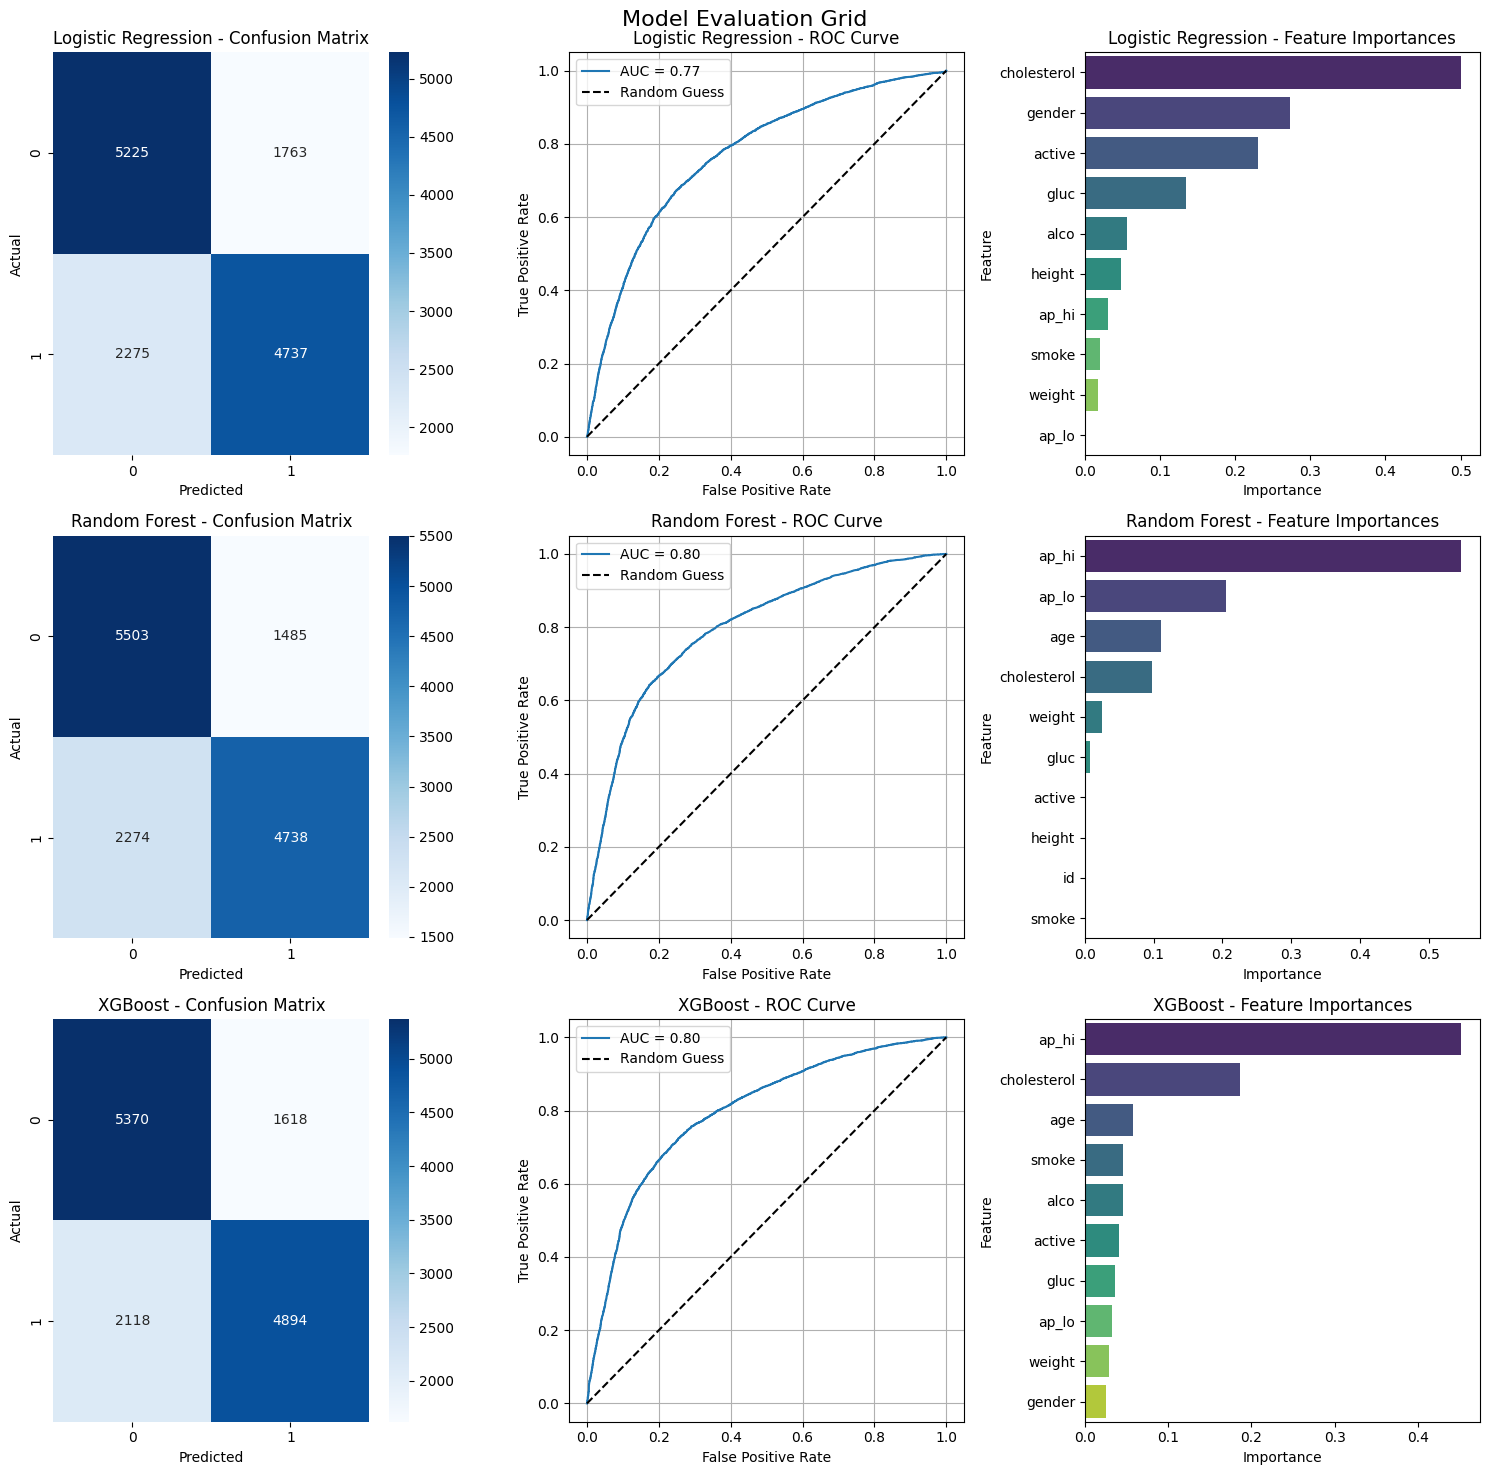

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
import pandas as pd
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

# Initialize models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rfc_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Feature names
feature_names = X.columns.tolist()

# Use the grid_chart function
grid_chart(
    X, y,
    models=[lr_model, rfc_model, xgb_model],
    model_names=["Logistic Regression", "Random Forest", "XGBoost"],
    feature_names=feature_names
)

C:\Users\visha\OneDrive\Documents\GitHub\Data-Science-Stuff\predicting_cardio_disease\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:25:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


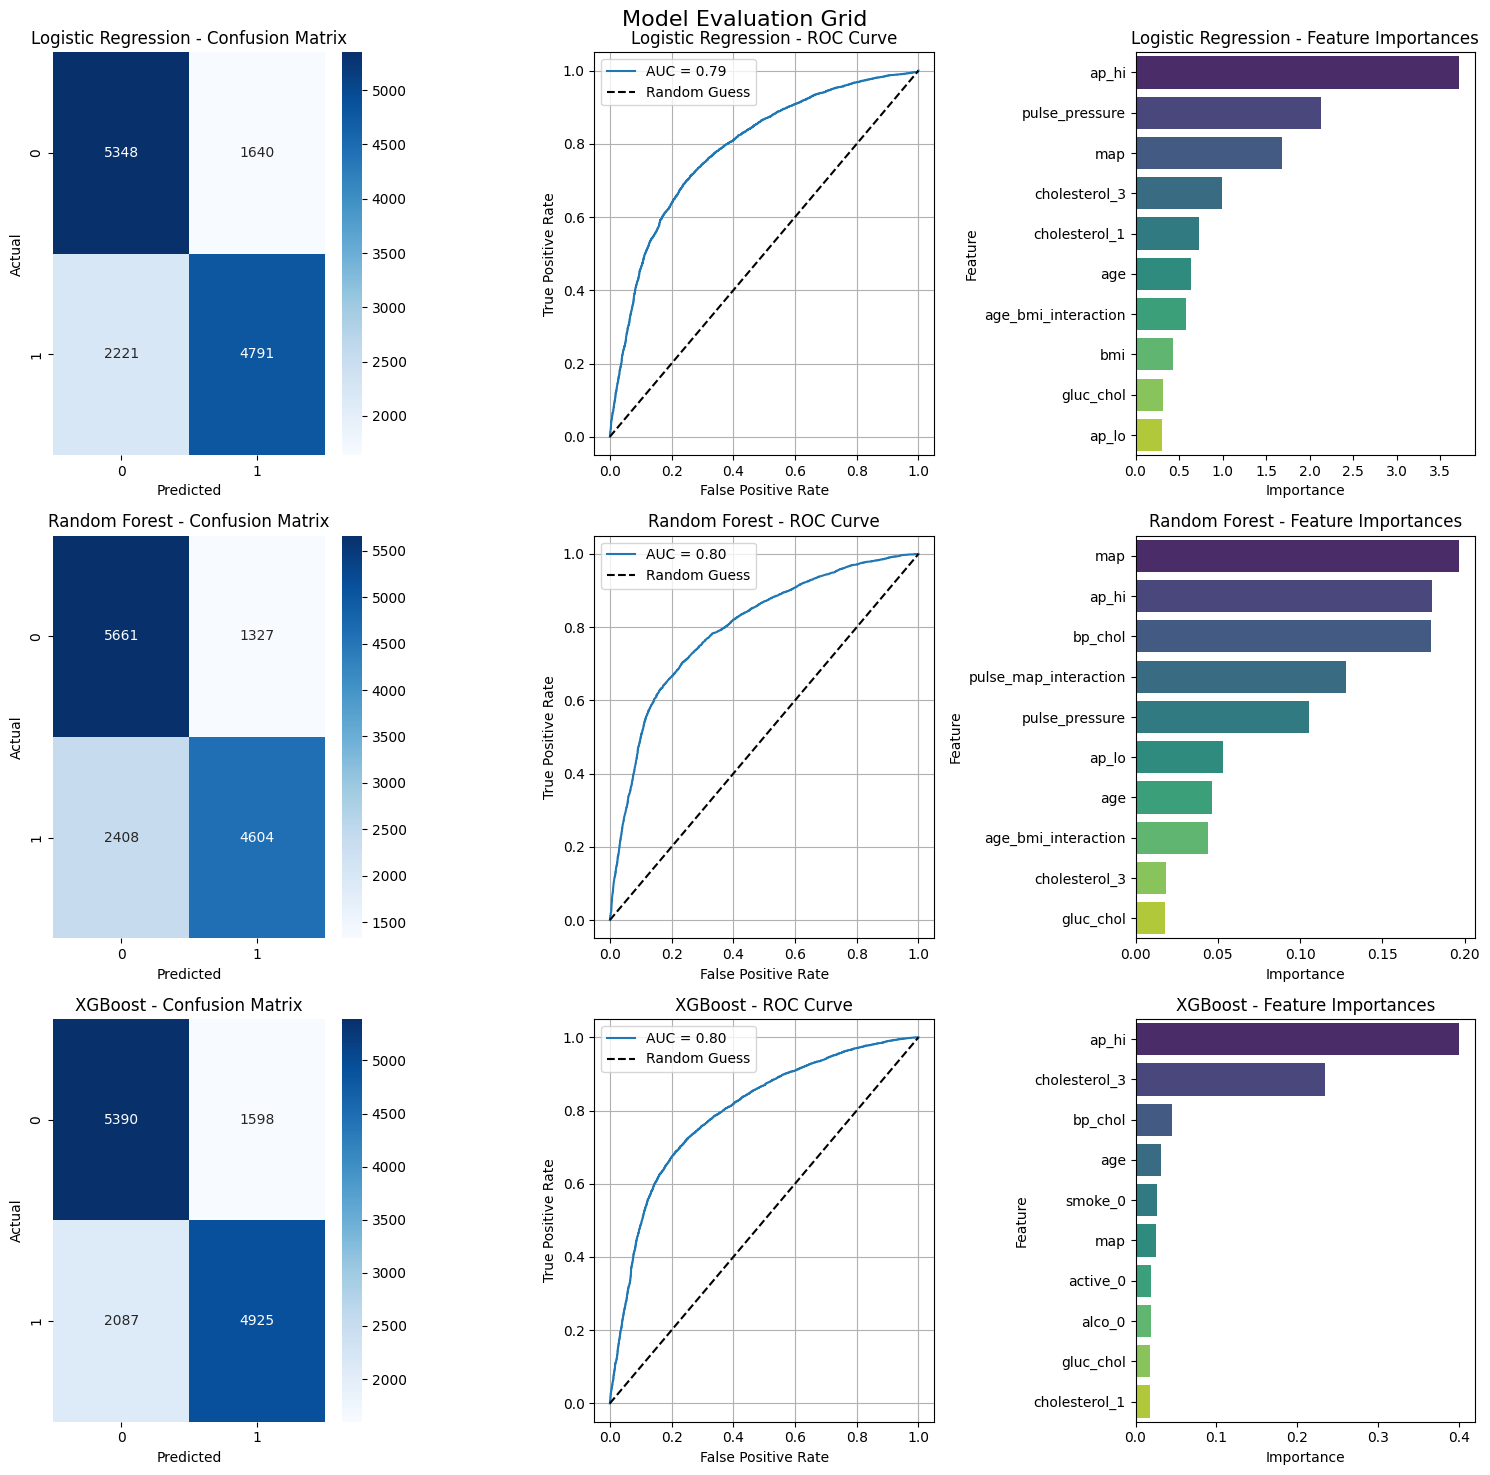

In [44]:
# Feature names
feature_names = X_.columns.tolist()

# Use the grid_chart function
grid_chart(
    X_, y,
    models=[lr_model, rfc_model, xgb_model],
    model_names=["Logistic Regression", "Random Forest", "XGBoost"],
    feature_names=feature_names
)

### Interpetations:
1. XGBoost Model performs well with overall accuracy 0.74 on transformed data and 0.79